In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("teertha/ushealthinsurancedataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/


In [67]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import time
sns.set()

In [4]:
os.listdir('/kaggle/input/')

['insurance.csv']

In [5]:
df = pd.read_csv('/kaggle/input/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.apply(pd.isnull).sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(1337, 7)

In [12]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
numerical_columns, categorical_columns = [], []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [15]:
print('The numerical columns are:', numerical_columns)
print('The categorical columns are:', categorical_columns)

The numerical columns are: ['age', 'bmi', 'children', 'charges']
The categorical columns are: ['sex', 'smoker', 'region']


In [16]:
for column in categorical_columns:
    print('The number of unique values in', column, 'columns is:', df[column].nunique())
    print('The unique values in', column, 'column are:', df[column].unique())
    print('The value counts of unique values of', column, 'column is:\n', df[column].value_counts())
    print('=====================================================================================')

The number of unique values in sex columns is: 2
The unique values in sex column are: ['female' 'male']
The value counts of unique values of sex column is:
 sex
male      675
female    662
Name: count, dtype: int64
The number of unique values in smoker columns is: 2
The unique values in smoker column are: ['yes' 'no']
The value counts of unique values of smoker column is:
 smoker
no     1063
yes     274
Name: count, dtype: int64
The number of unique values in region columns is: 4
The unique values in region column are: ['southwest' 'southeast' 'northwest' 'northeast']
The value counts of unique values of region column is:
 region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


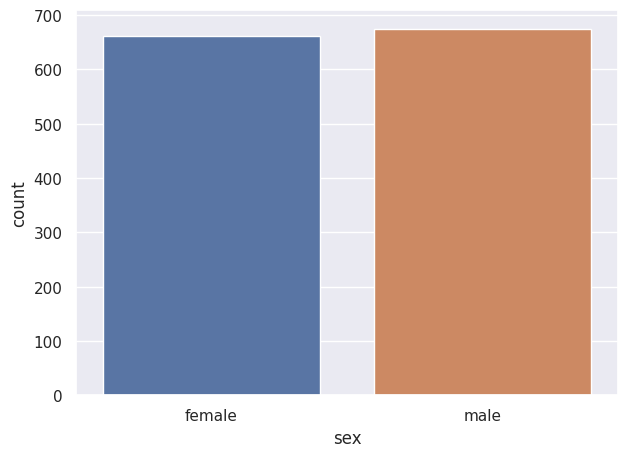

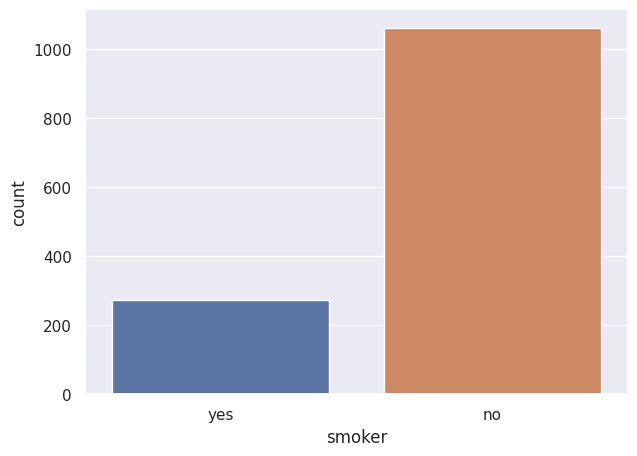

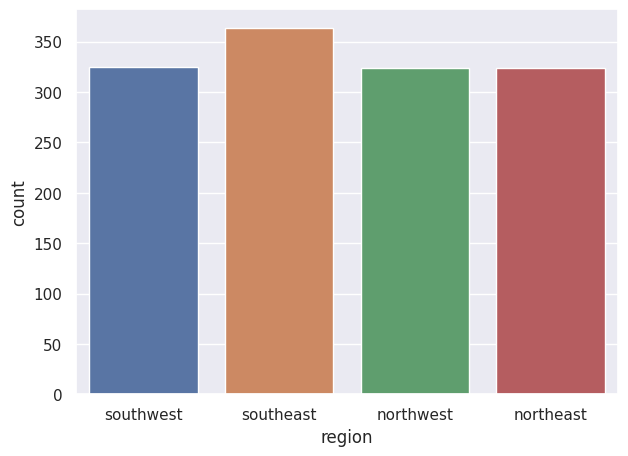

In [17]:
for column in categorical_columns:
    plt.figure(figsize = (7, 5))
    sns.countplot(data = df, x = column)
    plt.show()

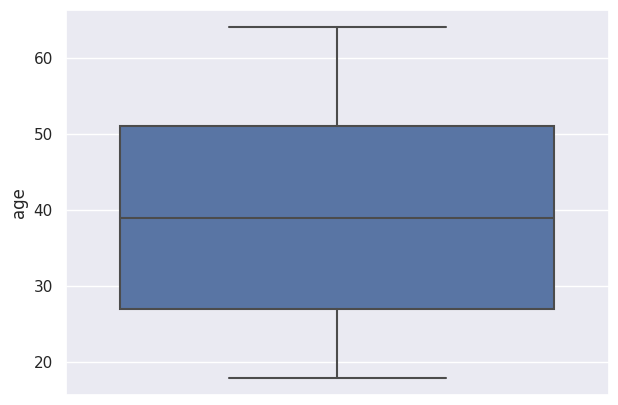

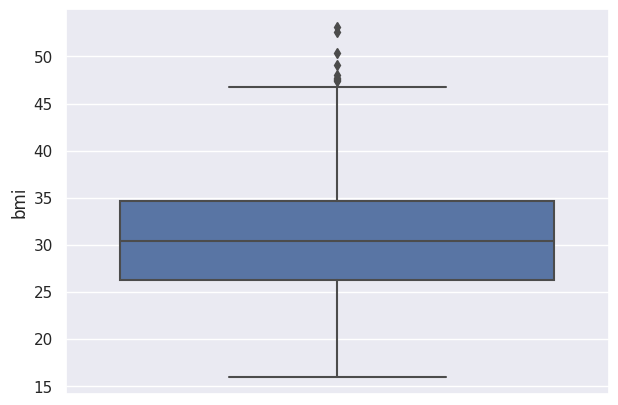

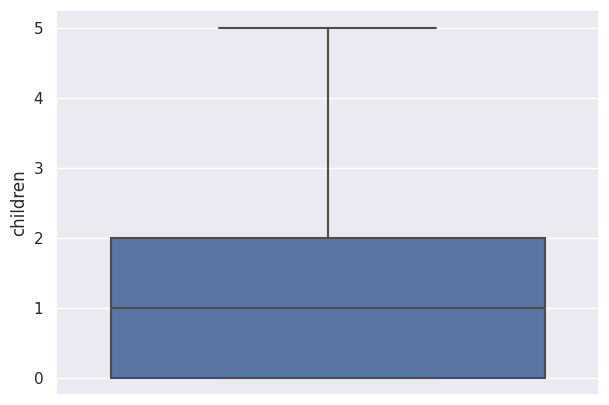

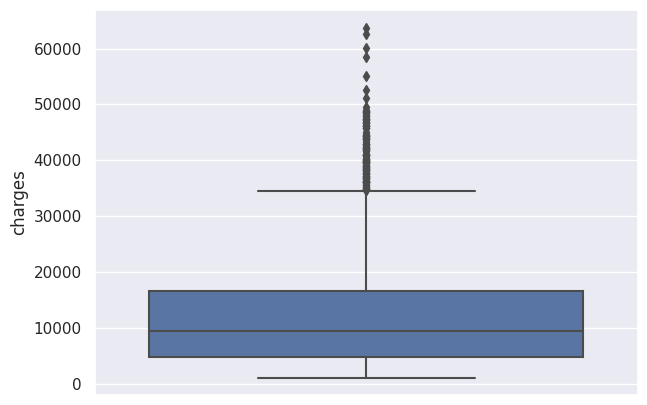

In [18]:
for column in numerical_columns:
    plt.figure(figsize = (7, 5))
    sns.boxplot(data = df, y = column)
    plt.show()

In [19]:
df[df['bmi'] > 46].shape

(16, 7)

In [20]:
df = df[df['bmi'] < 46]

In [21]:
df[df['charges'] > 33000].shape

(147, 7)

In [22]:
df = df[df['charges'] < 33000]

In [23]:
df.shape

(1174, 7)

In [24]:
numerical_columns.remove('charges')

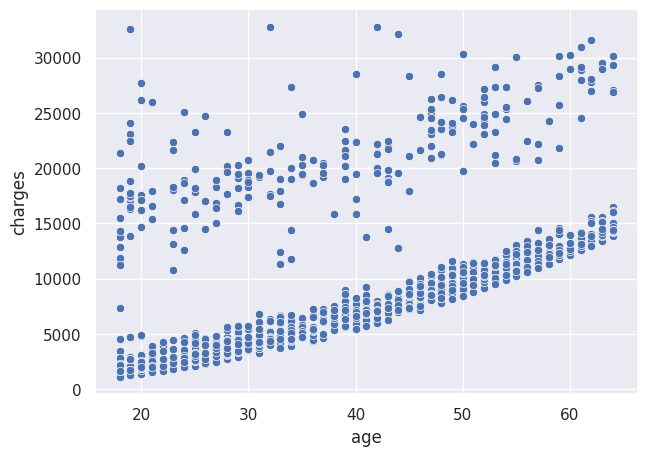

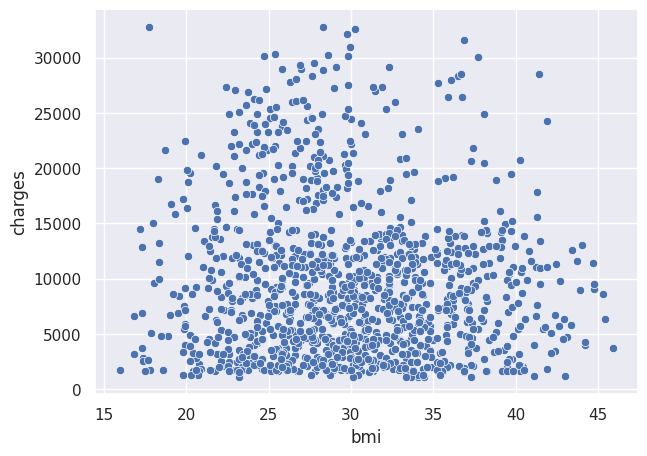

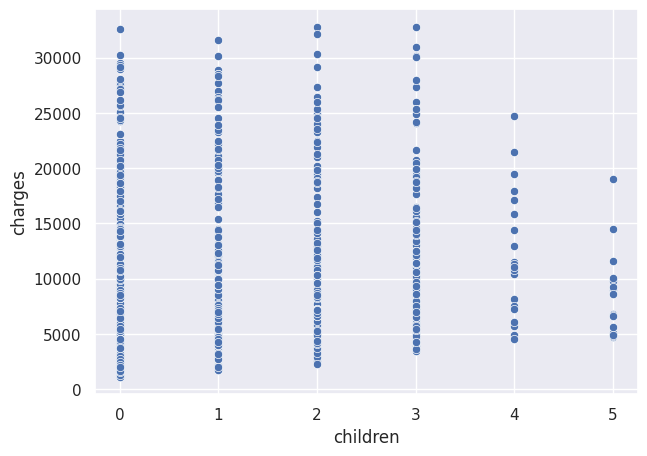

In [25]:
for column in numerical_columns:
    plt.figure(figsize = (7, 5))
    sns.scatterplot(data = df, x = column, y = 'charges')
    plt.show()

In [26]:
df = pd.get_dummies(data = df, columns = categorical_columns, drop_first = True, dtype = 'int32')

In [27]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [28]:
df.shape

(1174, 9)

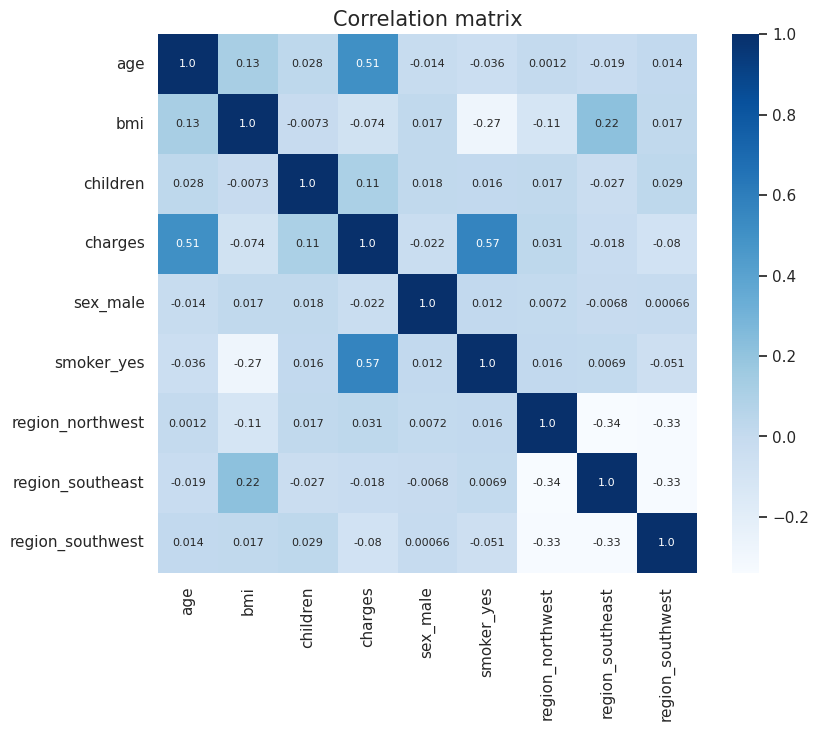

In [29]:
plt.figure(figsize = (9, 7))
sns.heatmap(df.corr(numeric_only = True), annot = True, square = True, cbar = True, annot_kws = {'size': 8}, fmt = '.2', cmap = 'Blues')
plt.title('Correlation matrix', fontsize = 15)
plt.show()

In [30]:
X = df.drop(columns = ['charges'], axis = 1)
y = df['charges']

In [31]:
scaler = StandardScaler()

In [32]:
X_scaled = scaler.fit_transform(X)

In [33]:
start_time = timer()

In [34]:
x1 = sm.add_constant(X_scaled)
model = sm.OLS(y, x1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     233.9
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          3.87e-236
Time:                        10:52:34   Log-Likelihood:                -11477.
No. Observations:                1174   AIC:                         2.297e+04
Df Residuals:                    1165   BIC:                         2.302e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9714.2895    124.831     77.820      0.000    9469.371    9959.208
x1          3576.2419    126.048     28.372      0.000    3328.936    3823.548
x2           236.4561    135.002      1.751      0.080     -28.419     501.331
x3           610.7951    125.023      4.885      0.000     365.500     856.091
x4          -161.6620    124.915     -1.294      0.196    -406.746      83.422
x5          4083.7022    130.172     31.372      0.000    3828.305    4339.100
x6          -157.3820    153.415     -1.026      0.305    -458.382     143.618
x7          -368.1775    157.093     -2.344      0.019    -676.394     -59.961
x8          -585.3419    153.543     -3.812      0.000    -886.593    -284.091
==============================================================================
Omnibus:                      796.410   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6881.369
Skew:                           3.237   Prob(JB):                         0.00
Kurtosis:                      12.938   Cond. No.                         2.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
end_time = timer()

In [36]:
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

[INFO] Total training time: 0.082 seconds


In [37]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [38]:
df1 = df.drop(columns = ['sex_male', 'region_northwest', 'bmi'], axis = 1)

In [39]:
X1 = df1.drop(columns = ['charges'], axis = 'columns')

In [40]:
X1_scaled = scaler.fit_transform(X1)

In [41]:
start_time = timer()

In [42]:
x2 = sm.add_constant(X1_scaled)
model2 = sm.OLS(y, x2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     372.2
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          1.02e-238
Time:                        10:52:35   Log-Likelihood:                -11480.
No. Observations:                1174   AIC:                         2.297e+04
Df Residuals:                    1168   BIC:                         2.300e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9714.2895    124.973     77.731      0.000    9469.093    9959.485
x1          3607.2380    125.127     28.829      0.000    3361.740    3852.736
x2           604.5192    125.113      4.832      0.000     359.047     849.991
x3          4020.0784    125.243     32.098      0.000    3774.351    4265.806
x4          -228.3058    132.412     -1.724      0.085    -488.097      31.486
x5          -486.3010    132.580     -3.668      0.000    -746.423    -226.179
==============================================================================
Omnibus:                      791.751   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6743.717
Skew:                           3.218   Prob(JB):                         0.00
Kurtosis:                      12.820   Cond. No.                         1.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
end_time = timer()

In [44]:
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

[INFO] Total training time: 0.066 seconds


In [45]:
X1.head()

,age,children,smoker_yes,region_southeast,region_southwest
0,19,0,1,0,1
1,18,1,0,1,0
2,28,3,0,1,0
3,33,0,0,0,0
4,32,0,0,0,0


In [46]:
X2 = X1.drop(columns = ['region_southeast'], axis = 1)

In [47]:
X2_scaled = scaler.fit_transform(X2)

In [48]:
x3 = sm.add_constant(X2_scaled)
model3 = sm.OLS(y, x3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     463.8
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          1.96e-239
Time:                        10:52:35   Log-Likelihood:                -11482.
No. Observations:                1174   AIC:                         2.297e+04
Df Residuals:                    1169   BIC:                         2.300e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9714.2895    125.078     77.666      0.000    9468.887    9959.692
x1          3610.5180    125.218     28.834      0.000    3364.842    3856.194
x2           608.4415    125.198      4.860      0.000     362.803     854.080
x3          4022.4265    125.342     32.092      0.000    3776.507    4268.346
x4          -411.1075    125.308     -3.281      0.001    -656.961    -165.254
==============================================================================
Omnibus:                      791.594   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6756.210
Skew:                           3.216   Prob(JB):                         0.00
Kurtosis:                      12.836   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [53]:
X2.head()

,age,children,smoker_yes,region_southwest
0,19,0,1,1
1,18,1,0,0
2,28,3,0,0
3,33,0,0,0
4,32,0,0,0


In [59]:
X2['charges'] = y

In [60]:
X2.head()

,age,children,smoker_yes,region_southwest,charges
0,19,0,1,1,16884.92400
1,18,1,0,0,1725.55230
2,28,3,0,0,4449.46200
3,33,0,0,0,21984.47061
4,32,0,0,0,3866.85520


In [68]:
lr_model = LinearRegression()

In [69]:
lr_model.fit(X2_scaled, y)

LinearRegression()

In [70]:
lr_model.score(X2_scaled, y)

0.6134262242940404